In [1]:
import yolov5
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

c:\Users\m.mikowski\Anaconda3\envs\env1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\m.mikowski/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-28 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA T600 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


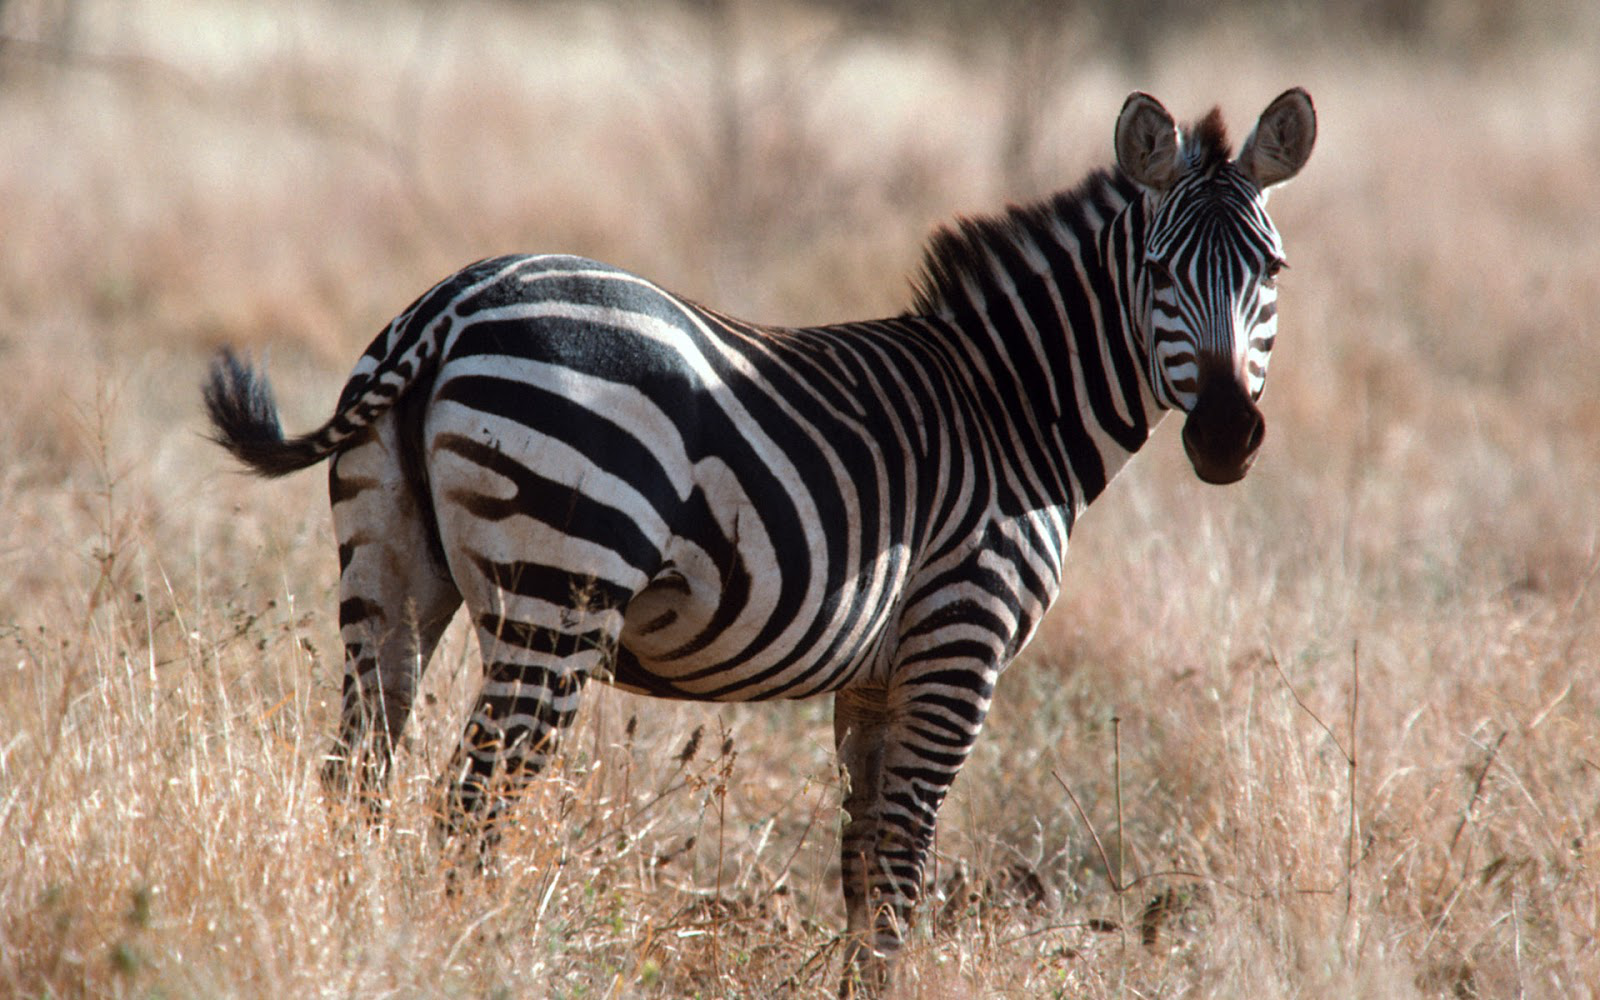

In [3]:
from PIL import Image

img = Image.open("zebra.jfif")
img

In [4]:
results = model(img)
results.print()

image 1/1: 1000x1600 1 zebra
Speed: 17.0ms pre-process, 23.0ms inference, 12.0ms NMS per image at shape (1, 3, 416, 640)


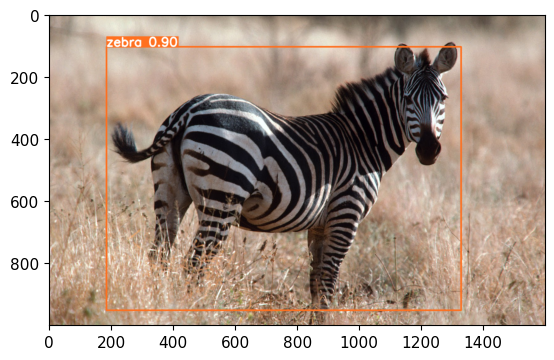

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.xyxy

[tensor([[1.85382e+02, 1.02621e+02, 1.32975e+03, 9.52913e+02, 9.03391e-01, 2.20000e+01]], device='cuda:0')]

In [8]:
#Real time detections
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [9]:
import uuid
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = {'danger', 'safe'}
number_imgs = 50

In [18]:
cap = cv2.VideoCapture(0)
# Looping labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    #Looping images
    for img in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img))

        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image collection', frame)
        time.sleep(2)

    

: 

: 

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img))
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()))
        print(imgname)